In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
import kid_readout.utils.readoutnc

In [39]:
rnc = kid_readout.utils.readoutnc.ReadoutNetCDF('/data/readout/2015-07-17_154400.nc')

In [40]:
s21 = rnc.sweep_20150717154728.s21[:]

In [41]:
fr = rnc.sweep_20150717154728.frequency[:]

(-50, -35)

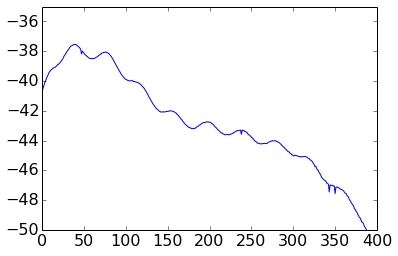

In [60]:
plot(20*np.log10(np.abs(s21[20::32])))
ylim(-50,-35)

(90, 200)

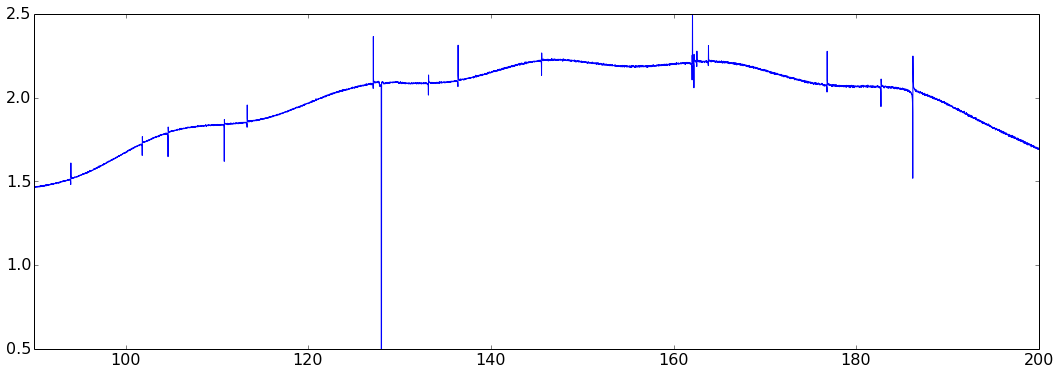

In [70]:
figure(figsize=(18,6))
s21c = s21*np.exp(-2j*np.pi*63.31*fr)
plot(fr,np.angle(s21c))
ylim(0.5,2.5)
xlim(90,200)

In [82]:
np.savez('/home/gjones/2015-07-17-resonance-search.npz',fr=fr,s21c=s21c)

In [84]:
resonators = np.array([93.99, 101.823, 104.658,110.8,113.3,127.11,133.17,136.4,145.56,162.068,162.245,162.56,163.8,176.82,182.73,186.2,])

In [85]:
resonators.shape

(16,)

In [89]:
np.save('/data/readout/resonances/2015-07-17-StarCryo-resonances.npy',resonators)

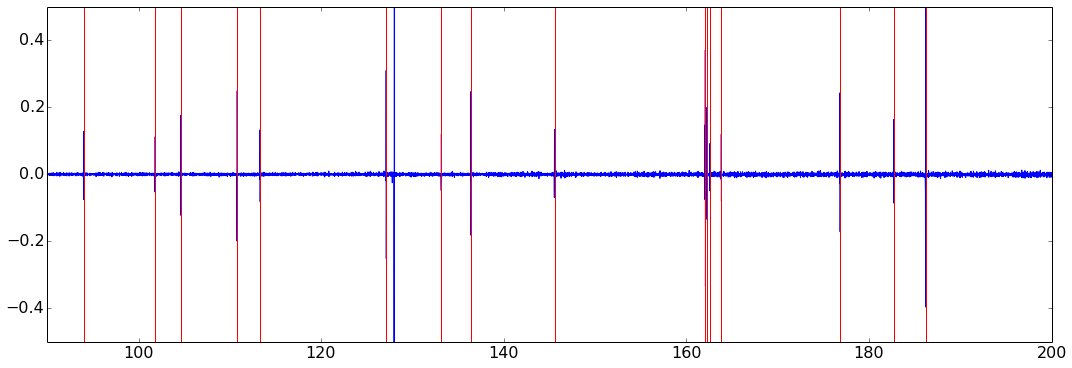

In [88]:
figure(figsize=(18,6))
s21c = s21*np.exp(-2j*np.pi*63.31*fr)
plot(fr[:-1],np.diff(np.angle(s21c)))
ylim(-0.5,0.5)
xlim(90,200)
ax = gca()
for k in resonators:
    ax.axvline(k,color='r')